In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 35)

## Loading and exploring data

In [72]:
df = pd.read_csv("data/data.csv")
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,45.566667,17.166667,55.20,NaN,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,NaN,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,45.890000,NaN,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,94.385668,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


df.tail()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

When I tried to convert the columns with object dtype to numeric dtype, it didn't work, because there seemed to be some strings in those columns. Lets check what those are :

In [74]:
mask = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce').isna()

# Filter those problematic rows
problematic_rows = df[mask]
print(problematic_rows.shape)

# Now you can inspect them
problematic_rows['equipment_energy_consumption'].value_counts()

(912, 29)


equipment_energy_consumption
unknown    20
error      19
???        19
check      10
Name: count, dtype: int64

In [75]:
mask = pd.to_numeric(df['lighting_energy'], errors='coerce').isna()

# Filter those problematic rows
problematic_rows = df[mask]

# Now you can inspect them
print(problematic_rows.shape)

# Now you can inspect them
problematic_rows['lighting_energy'].value_counts()

(864, 29)


lighting_energy
???        24
error      13
check       9
unknown     9
Name: count, dtype: int64

In [76]:
mask = pd.to_numeric(df['zone1_temperature'], errors='coerce').isna()

# Filter those problematic rows
problematic_rows = df[mask]

print(problematic_rows.shape)

# Now you can inspect them
problematic_rows['zone1_temperature'].value_counts()

(949, 29)


zone1_temperature
???        27
unknown    19
check      19
error      17
Name: count, dtype: int64

In [77]:
mask = pd.to_numeric(df['zone1_humidity'], errors='coerce').isna()

# Filter those problematic rows
problematic_rows = df[mask]

# Now you can inspect them
print(problematic_rows.shape)

# Now you can inspect them
problematic_rows['zone1_humidity'].value_counts()

(888, 29)


zone1_humidity
error      25
???        23
unknown    22
check      17
Name: count, dtype: int64

In [78]:
mask = pd.to_numeric(df['zone2_temperature'], errors='coerce').isna()

# Filter those problematic rows
problematic_rows = df[mask]

print(problematic_rows.shape)

# Now you can inspect them
problematic_rows['zone2_temperature'].value_counts()

(923, 29)


zone2_temperature
error      23
???        19
check      16
unknown    12
Name: count, dtype: int64

All of these columns seem to have the same four strings in them. So lets just make them null values.

In [79]:

invalid_entries = ['error', '???', 'unknown', 'check']

# List of target columns
cols_to_clean = ['equipment_energy_consumption', 'lighting_energy', 
                 'zone1_temperature', 'zone1_humidity', 'zone2_temperature']

# Replace all invalid string entries with np.nan across the target columns
df[cols_to_clean] = df[cols_to_clean].replace(invalid_entries, np.nan)

# Now convert columns to float
df[cols_to_clean] = df[cols_to_clean].astype(float)


In [80]:
df['equipment_energy_consumption'] = df['equipment_energy_consumption'].astype(float)
df['lighting_energy'] = df['lighting_energy'].astype(float)
df['zone1_temperature'] = df['zone1_temperature'].astype(float)
df['zone1_humidity'] = df['zone1_humidity'].astype(float)
df['zone2_temperature'] = df['zone2_temperature'].astype(float)



Now they have converted successfully.

In [82]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [83]:
df.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

In [84]:
print("Shape of the dataset:", df.shape)
print("Size of the dataset:", df.size)
print("Number of unique values:", df.nunique())

Shape of the dataset: (16857, 29)
Size of the dataset: 488853
Number of unique values: timestamp                       16769
equipment_energy_consumption      126
lighting_energy                    15
zone1_temperature                 429
zone1_humidity                   2168
zone2_temperature                 834
zone2_humidity                   2166
zone3_temperature                 862
zone3_humidity                   1986
zone4_temperature                 923
zone4_humidity                   2445
zone5_temperature                1633
zone5_humidity                   6278
zone6_temperature                3144
zone6_humidity                   8359
zone7_temperature                1427
zone7_humidity                   4931
zone8_temperature                1672
zone8_humidity                   5382
zone9_temperature                 514
zone9_humidity                   2387
outdoor_temperature              1434
atmospheric_pressure             2106
outdoor_humidity                  607
w

1) It seems that there are only 16769 unique timestamps in the dataset while there are 16857 total values and 0 null values. This means there could be 188 duplicates, let's explore more to find out.
2) ['timestamp', 'equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature'] - these columns do not belong to the correct datatype. So lets fix that.

In [85]:
df = df.drop_duplicates()
print("Shape of the dataset:", df.shape)
print("Size of the dataset:", df.size)
print("Number of unique values:", df.nunique())

Shape of the dataset: (16789, 29)
Size of the dataset: 486881
Number of unique values: timestamp                       16769
equipment_energy_consumption      126
lighting_energy                    15
zone1_temperature                 429
zone1_humidity                   2168
zone2_temperature                 834
zone2_humidity                   2166
zone3_temperature                 862
zone3_humidity                   1986
zone4_temperature                 923
zone4_humidity                   2445
zone5_temperature                1633
zone5_humidity                   6278
zone6_temperature                3144
zone6_humidity                   8359
zone7_temperature                1427
zone7_humidity                   4931
zone8_temperature                1672
zone8_humidity                   5382
zone9_temperature                 514
zone9_humidity                   2387
outdoor_temperature              1434
atmospheric_pressure             2106
outdoor_humidity                  607
w

It seems there are still 20 more columns with duplicates. Lets see what those are.

In [87]:
df['timestamp'].value_counts().head(20)

timestamp
2016-02-05 09:50:00    2
2016-02-04 11:20:00    2
2016-03-02 04:40:00    2
2016-02-13 15:50:00    2
2016-01-15 04:20:00    2
2016-02-26 20:00:00    2
2016-02-22 22:40:00    2
2016-01-18 18:10:00    2
2016-01-25 21:50:00    2
2016-03-28 17:40:00    2
2016-04-01 16:10:00    2
2016-04-05 21:10:00    2
2016-04-08 20:10:00    2
2016-04-15 01:10:00    2
2016-04-16 05:30:00    2
2016-04-20 15:30:00    2
2016-04-29 06:40:00    2
2016-05-02 10:30:00    2
2016-05-02 13:20:00    2
2016-05-04 04:30:00    2
Name: count, dtype: int64

In [88]:
duplicate_timestamps = df[df.duplicated('timestamp', keep=False)]

# Sort for easier inspection
duplicate_timestamps = duplicate_timestamps.sort_values(by='timestamp')

# View duplicates
duplicate_timestamps

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
501,2016-01-15 04:20:00,60.000000,0.0,22.823333,39.500000,21.823333,39.126667,21.290000,43.626667,18.323333,43.000000,18.290000,54.400000,NaN,95.366667,18.500000,42.626667,19.290000,-49.230000,17.290000,47.700000,2.800000,750.966667,80.666667,10.000000,NaN,-0.300000,27.708853,27.708853
502,2016-01-15 04:20:00,60.000000,0.0,22.823333,39.500000,21.823333,39.126667,21.290000,43.626667,18.323333,43.000000,18.290000,54.400000,NaN,95.366667,18.500000,42.626667,19.290000,49.230000,17.290000,47.700000,2.800000,750.966667,80.666667,10.000000,NaN,-0.300000,27.708853,27.708853
1019,2016-01-18 18:10:00,70.000000,10.0,19.100000,41.200000,17.823333,41.530000,19.390000,40.400000,18.500000,38.126667,17.390000,54.590000,-2.000000,90.143333,18.700000,34.500000,NaN,41.700000,17.000000,37.090000,-2.083333,756.600000,86.333333,3.000000,24.000000,-4.083333,44.782315,44.782315
1020,2016-01-18 18:10:00,70.000000,10.0,19.100000,41.200000,17.823333,41.530000,19.390000,40.400000,18.500000,-38.126667,17.390000,54.590000,-2.000000,90.143333,18.700000,34.500000,NaN,41.700000,17.000000,37.090000,-2.083333,756.600000,86.333333,3.000000,24.000000,-4.083333,44.782315,44.782315
2052,2016-01-25 21:50:00,80.000000,10.0,20.890000,43.433333,20.200000,42.590000,20.600000,44.693333,19.790000,44.326667,NaN,49.346111,8.990000,97.323333,17.981667,40.482222,18.975556,-9.059527,17.000000,47.090000,9.800000,763.683333,81.500000,4.166667,30.833333,6.700000,NaN,6.192611
2053,2016-01-25 21:50:00,80.000000,10.0,20.890000,43.433333,20.200000,-42.590000,20.600000,44.693333,19.790000,44.326667,NaN,49.346111,8.990000,97.323333,17.981667,40.482222,18.975556,-9.059527,17.000000,47.090000,9.800000,763.683333,81.500000,4.166667,30.833333,6.700000,NaN,6.192611
3434,2016-02-04 11:20:00,50.000000,0.0,20.890000,39.400000,19.150000,42.145000,21.790000,37.290000,19.790000,38.290000,19.290000,45.000000,11.263333,29.023333,20.000000,33.826667,4.502372,39.590000,19.600000,37.590000,8.333333,758.000000,77.666667,2.000000,53.000000,4.633333,10.504919,10.504919
3435,2016-02-04 11:20:00,1139.985693,20.0,8.726818,44.590000,19.790000,42.400000,21.295556,42.570000,20.500000,42.200000,18.600000,53.245000,5.530000,97.300000,18.200000,37.824737,20.533333,44.500000,18.200000,45.060000,5.500000,761.466667,96.000000,7.000000,51.333333,4.900000,11.967082,11.967082
3571,2016-02-05 09:50:00,50.000000,0.0,21.200000,46.260000,20.390000,NaN,21.745000,NaN,19.790000,46.826667,18.600000,-59.637778,9.300000,98.590000,18.390000,43.900000,20.500000,51.602222,18.600000,NaN,8.966667,763.700000,98.000000,4.166667,41.666667,8.666667,42.356488,42.356488
3570,2016-02-05 09:50:00,50.000000,0.0,21.200000,-46.260000,20.390000,NaN,21.745000,NaN,19.790000,46.826667,18.600000,59.637778,9.300000,98.590000,18.390000,43.900000,20.500000,51.602222,18.600000,NaN,8.966667,763.700000,98.000000,4.166667,41.666667,8.666667,42.356488,42.356488


we can see that some columns with duplilcate timestamps are the exact same except for some specific columns. Lets first make the negative values in columns like humidity and energy to positive values by takings abs(). Because these values cannot be negative.


In [89]:

# List of numeric columns (where negatives don't make sense)
columns_no_negatives = [
    'equipment_energy_consumption',
    'lighting_energy',
    'zone1_humidity', 'zone2_humidity', 'zone3_humidity', 'zone4_humidity',
    'zone5_humidity', 'zone6_humidity', 'zone7_humidity', 'zone8_humidity', 'zone9_humidity',
    'outdoor_humidity',
    'atmospheric_pressure',
    'wind_speed',
    'visibility_index',
]

# Convert negative values to positive
df[columns_no_negatives] = df[columns_no_negatives].abs()

Since the columns like humidity are relative humidity percentages, they can't be negative. Similarly energy, consumption and other columns also have to be 0 or more. So we are changing their sign to keep the absolute values. But this results in having two copies of the same data. So lets keep the first and remove the duplicate.

In [90]:
df.drop_duplicates(subset=['timestamp'], keep='first', inplace=True)

In [91]:
print(df.shape[0])
print(df['timestamp'].nunique())

16769
16769


In [92]:
new_df = df.copy()

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60.0,77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,45.566667,17.166667,55.20,NaN,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,NaN,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,NaN,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,94.385668,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [68]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    909
lighting_energy                 861
zone1_temperature               943
zone1_humidity                  886
zone2_temperature               917
zone2_humidity                  862
zone3_temperature               797
zone3_humidity                  876
zone4_temperature               809
zone4_humidity                  775
zone5_temperature               829
zone5_humidity                  797
zone6_temperature               841
zone6_humidity                  841
zone7_temperature               787
zone7_humidity                  800
zone8_temperature               841
zone8_humidity                  775
zone9_temperature               770
zone9_humidity                  883
outdoor_temperature             801
atmospheric_pressure            841
outdoor_humidity                792
wind_speed                      819
visibility_index                808
dew_point                       823
random_variable1            

In [71]:
print((df.isnull().any(axis=1).sum()/df.shape[0])*100)

75.72902379390543


Though each column only has 700-1000 missing values, in the entire dataframe 75 percent of the rows have atleast one missing value. So we cant simply remove them.

<Axes: >

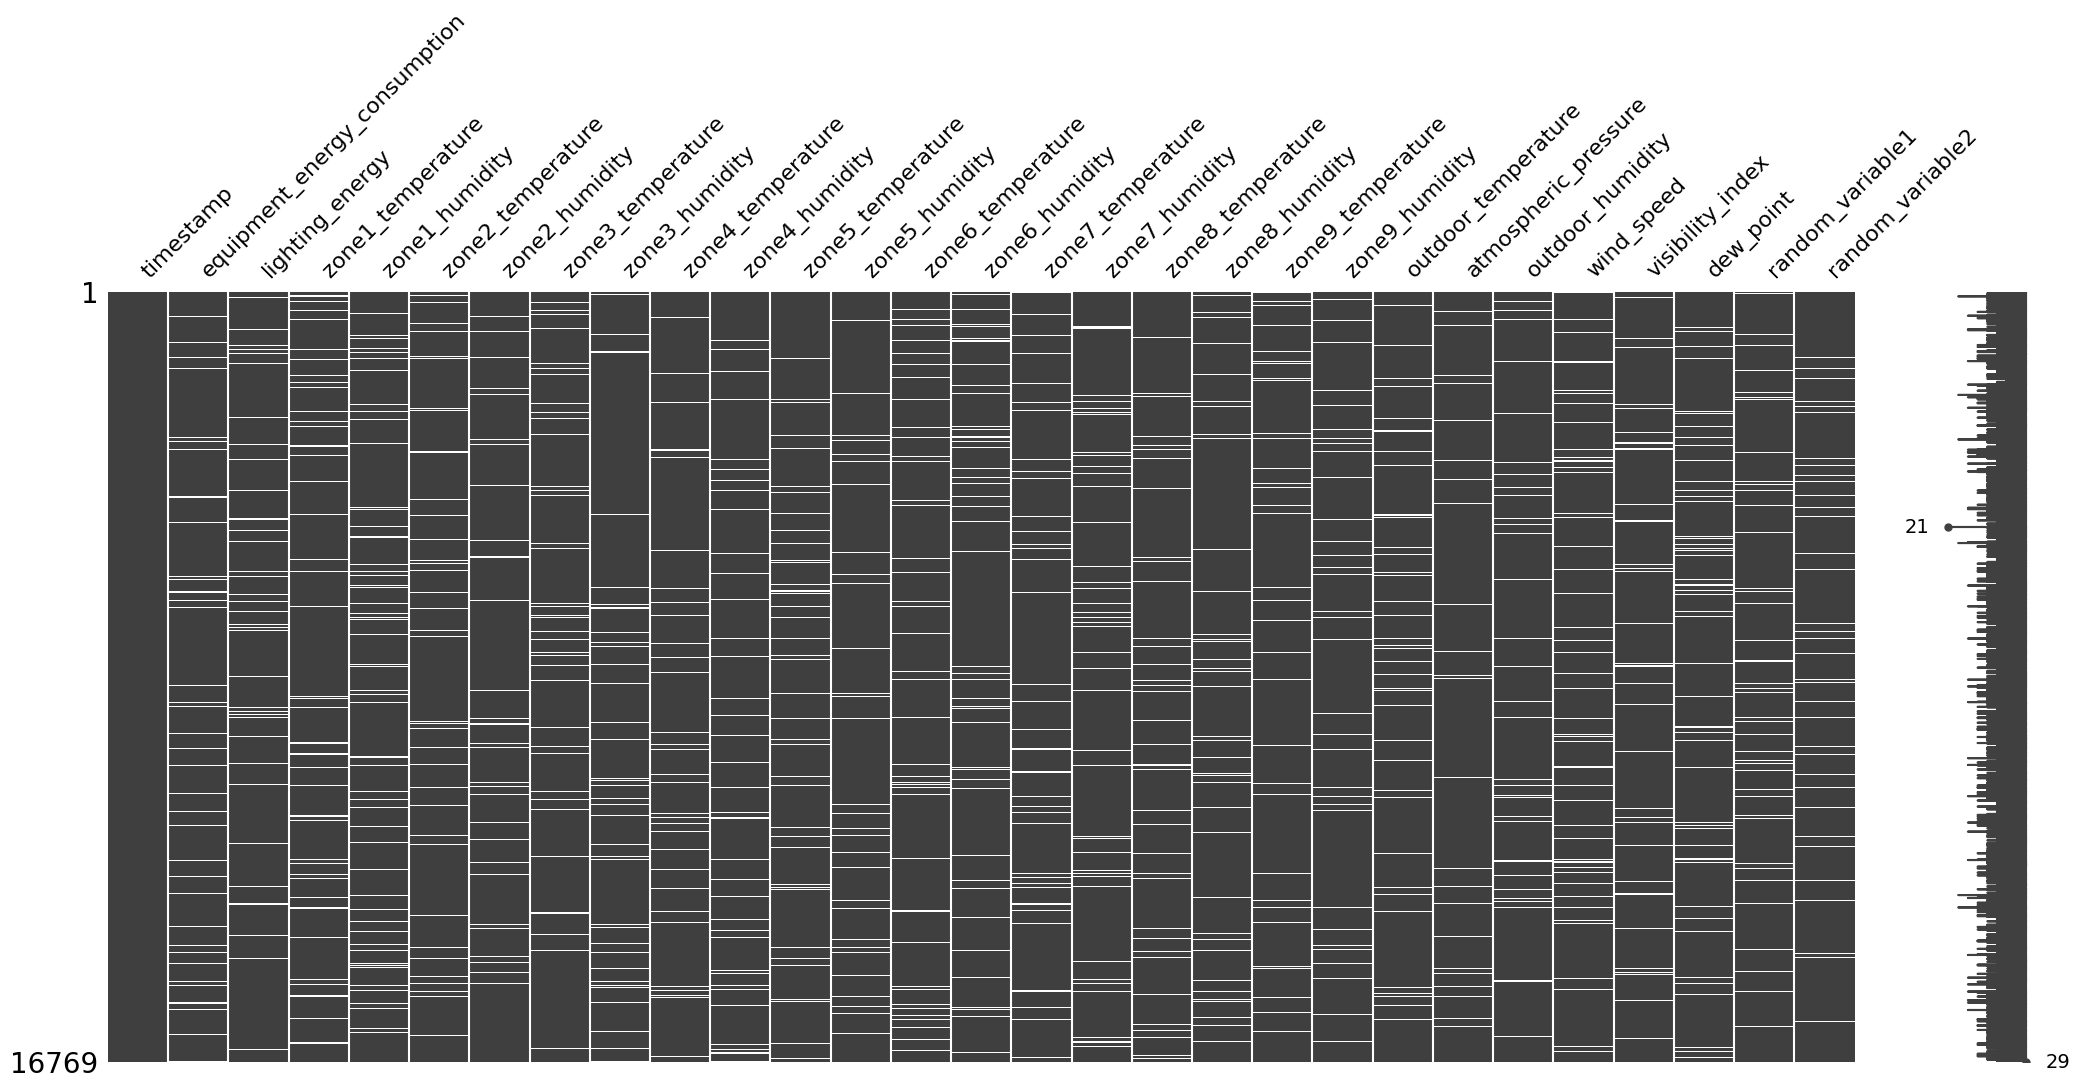

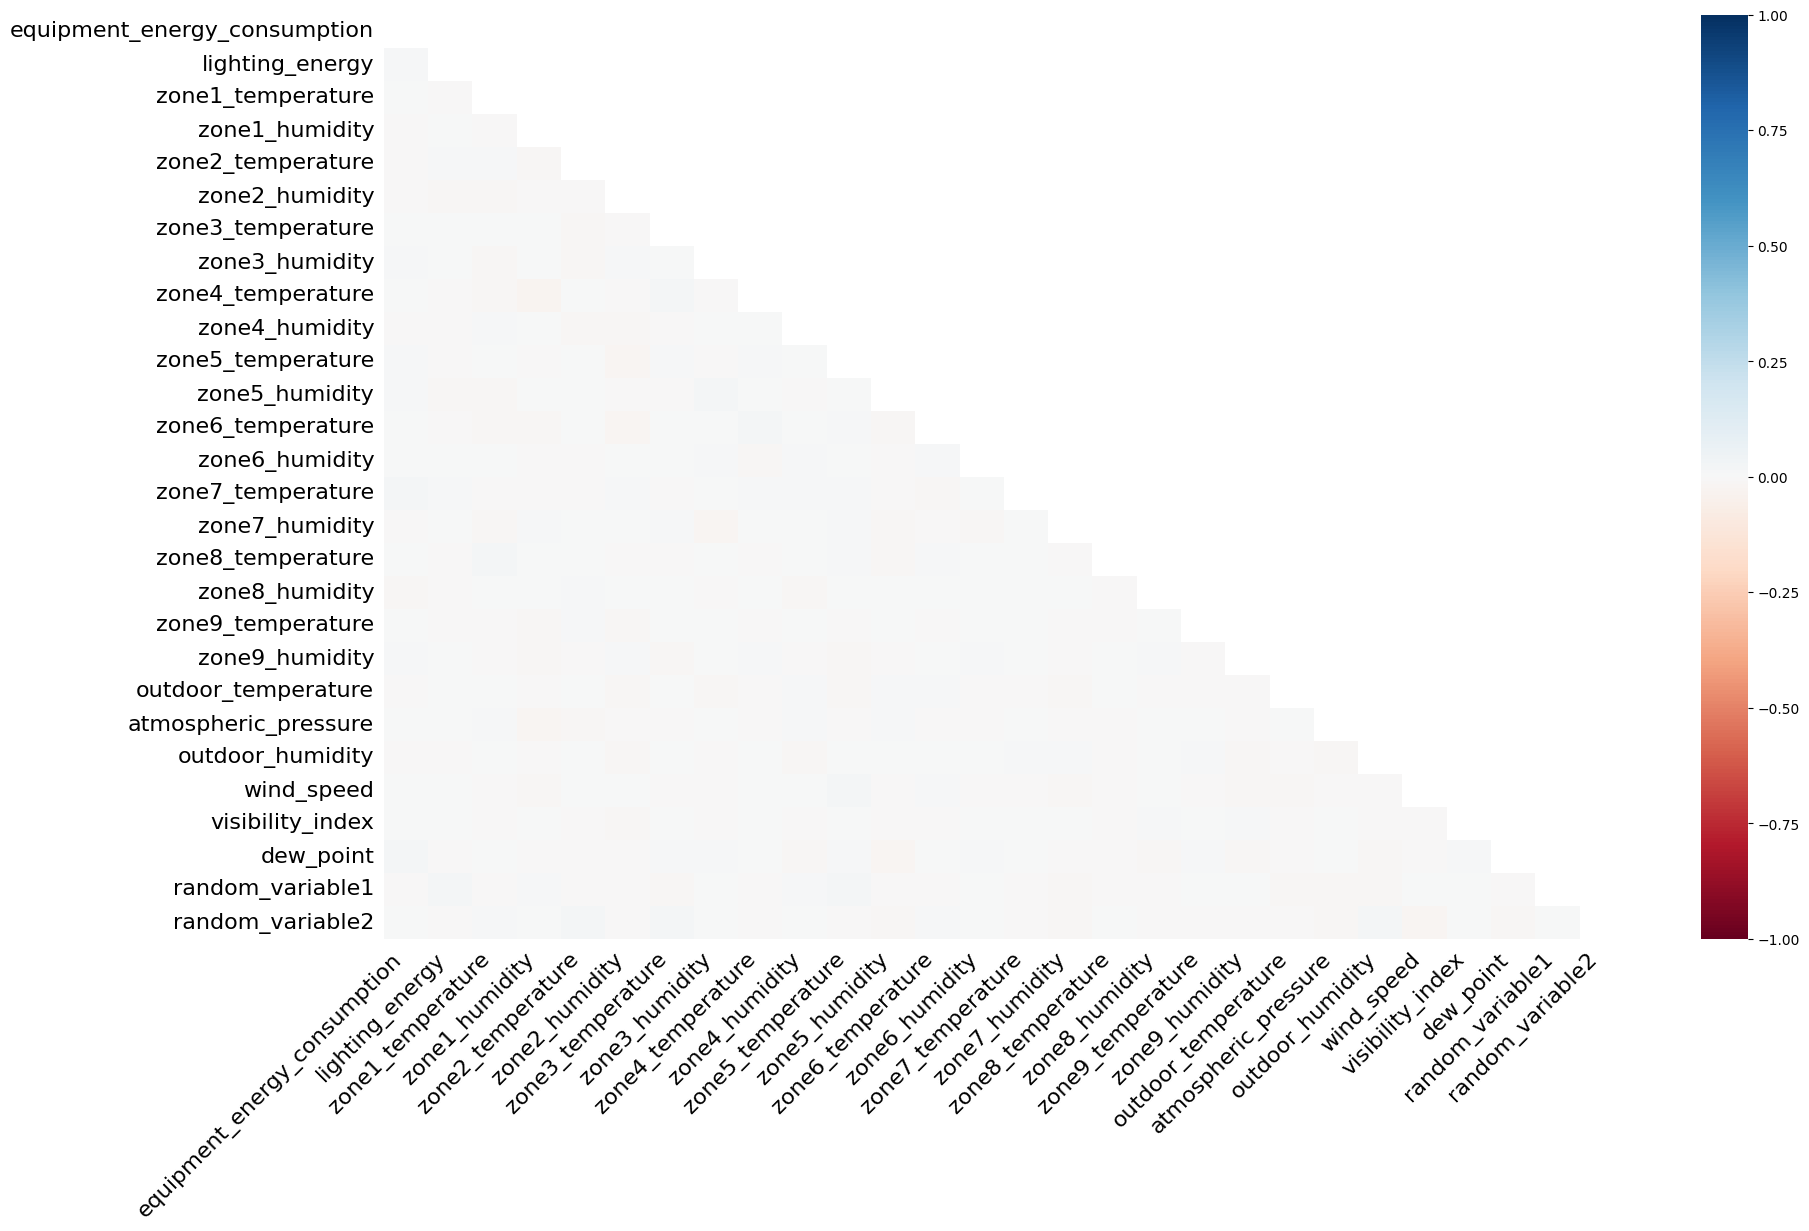

In [24]:
import missingno as msno
msno.matrix(df)
msno.heatmap(df)


There doesn't seem to be any obvious co-occuring of missing values.

Our data is time-series data, so the values will be temporal. So we have to create some time specific features to make sure, we are capturing the patterns. These patterns can help us understand what the true outliers are.

In [95]:
df['timestamp'] = pd.to_datetime
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['dayofweek'] = df.index.dayofweek  # 0 = Monday, 6 = Sunday
df['month'] = df.index.month
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
df['date'] = df.index.date  

In [ ]:
df.head()